In [2]:
%cd ../../
from subjectivity.subjectivity_classifier import SubjectivityClassifier
classifier = SubjectivityClassifier(model_filename='./data/save/subj-29.tf',
                                    word_filename='./data/word_embeddings/glove/glove.6B.50d.txt')

/Users/norahtan/Development/Expose


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

INFO:tensorflow:Restoring parameters from ./data/save/subj-29.tf


In [3]:
def count_sentences_in_dict_attribute(d, attribute):
    return d[attribute]

In [4]:
import os
path = './webcrawler/nytimes-article-crawler-master/NYT/'
files = [f for f in os.listdir(path)]
subjective_fraction_list = []
for f in files:
    print(str(f))
    with open(path + str(f)) as file:
        text = file.read()
        result = classifier.classify_sentences_in_text(text)
        print(result)
        objective_sentences = count_sentences_in_dict_attribute(result, 'objective')
        subjective_sentences = count_sentences_in_dict_attribute(result, 'subjective')
        total_sentences = objective_sentences + objective_sentences
        subjective_fraction_list.append(subjective_sentences / total_sentences)

NYT_3.txt
{'subjective': 661, 'objective': 8096}
NYT_26.txt
{'subjective': 355, 'objective': 5553}
NYT_32.txt
{'subjective': 1044, 'objective': 4745}
NYT_33.txt
{'subjective': 4325, 'objective': 6257}
NYT_27.txt
{'subjective': 6357, 'objective': 1448}
NYT_2.txt
{'subjective': 2835, 'objective': 4883}
NYT_19.txt
{'subjective': 886, 'objective': 8952}
NYT_31.txt
{'subjective': 707, 'objective': 2828}
NYT_25.txt
{'subjective': 1299, 'objective': 6400}
NYT_24.txt
{'subjective': 2423, 'objective': 6966}
NYT_30.txt
{'subjective': 0, 'objective': 3548}
NYT_18.txt
{'subjective': 23457, 'objective': 22521}
NYT_1.txt
{'subjective': 26632, 'objective': 22284}
NYT_5.txt
{'subjective': 805, 'objective': 6196}
NYT_34.txt
{'subjective': 10382, 'objective': 18401}
NYT_20.txt
{'subjective': 1667, 'objective': 8705}
NYT_21.txt
{'subjective': 1225, 'objective': 12014}
NYT_35.txt
{'subjective': 654, 'objective': 7923}
NYT_4.txt
{'subjective': 2485, 'objective': 5110}
NYT_6.txt
{'subjective': 1112, 'object

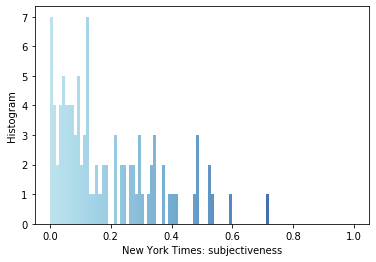

In [18]:
# import matplotlib.pyplot as plt
# import numpy as np
# hist, bins = np.histogram(subjective_fraction_list, bins=20, range=[0,1])
# center = (bins[:-1] + bins[1:]) / 2
# w = np.diff(bins)
# _, ax = plt.subplots(figsize=(8,3))
# ax.bar(center, hist, align='center', width=w)
# ax.set_xlabel('New York Times: subjectiveness')
# ax.set_ylabel('Histogram')
# plt.show()



import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('RdYlBu_r')

# Plot histogram.
n, bins, patches = plt.hist(subjective_fraction_list, bins=100, range=[0,1])
center = (bins[:-1] + bins[1:]) / 2

# scale values to interval [0,1]
col = center - min(center)
col /= max(col)
col /= 9
col = col[::-1]
plt.xlabel('New York Times: subjectiveness')
plt.ylabel('Histogram')
plt.savefig('test.jpg')

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(3 * c))

plt.show()